/tmp/ipython-input-875388612.py:33: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Accuracy: 0.9649122807017544

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



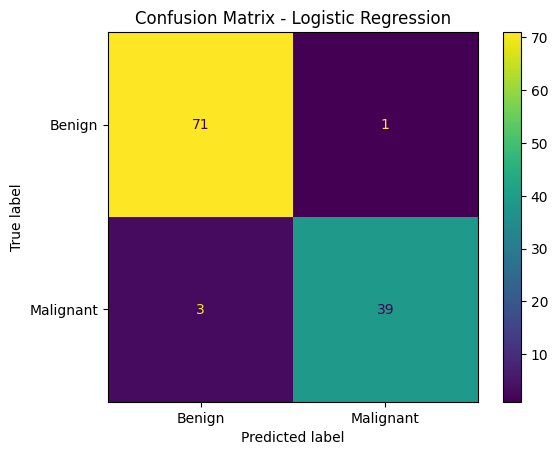

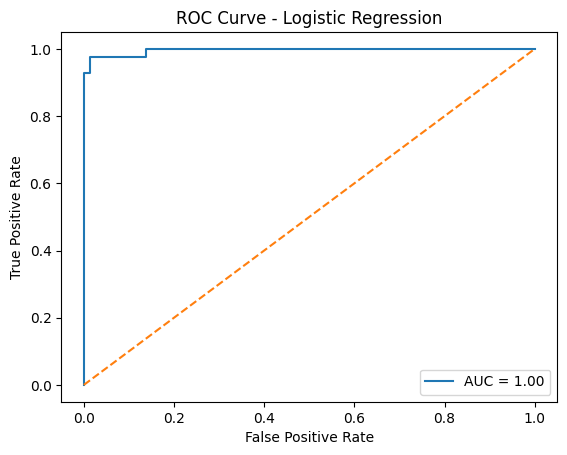

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Tuned Model Accuracy: 0.9649122807017544


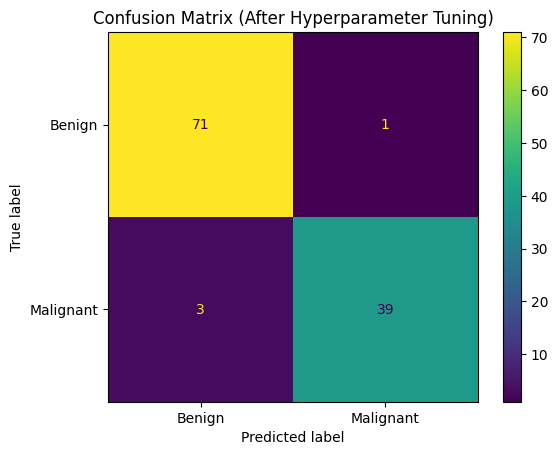

In [ ]:
# =========================
# Breast Cancer Logistic Regression (Single Cell)
# =========================

# Install dependency
!pip install kagglehub[pandas-datasets]

# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# -------------------------
# Load Dataset from Kaggle
# -------------------------
file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    file_path
)

print("Dataset Shape:", df.shape)
display(df.head())

# -------------------------
# Data Preprocessing
# -------------------------
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Train Logistic Regression
# -------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# Performance Metrics
# -------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------
# Confusion Matrix (Visual)
# -------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# -------------------------
# ROC Curve (Visual)
# -------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# -------------------------
# Hyperparameter Tuning
# -------------------------
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,A
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

# -------------------------
# Confusion Matrix After Tuning
# -------------------------
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(cm_best, display_labels=["Benign", "Malignant"])
disp.plot()
plt.title("Confusion Matrix (After Hyperparameter Tuning)")
plt.show()


/tmp/ipython-input-63052763.py:30: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset Shape: (569, 33)

Mean Squared Error (MSE): 0.0641
Mean Absolute Error (MAE): 0.1969
R-squared Score: 0.7271


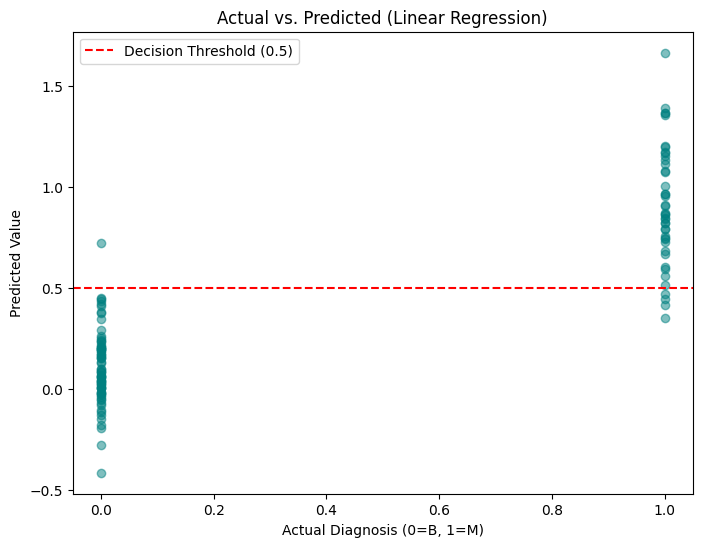

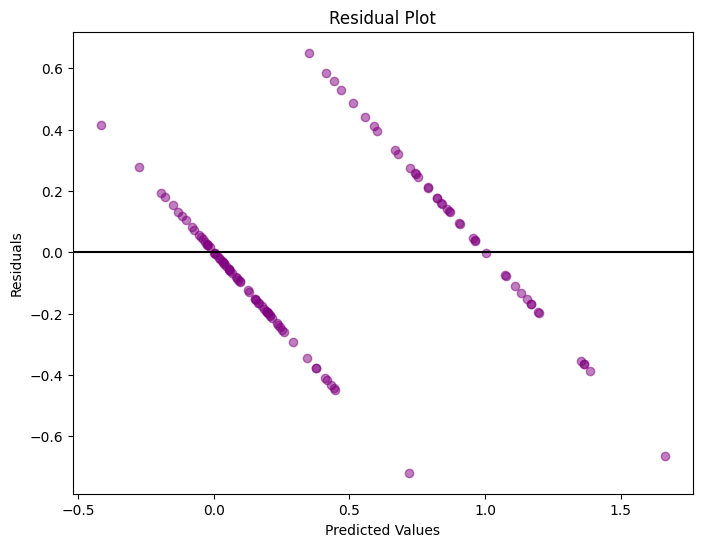


Top 5 Positive Coefficients (Drive toward Malignant):
radius_worst           1.030589
perimeter_mean         0.553346
concave points_mean    0.186887
concavity_worst        0.128794
radius_se              0.122265
dtype: float64


In [2]:
# =========================
# Breast Cancer Linear Regression
# =========================

# Install dependency
# !pip install kagglehub[pandas-datasets]

# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# -------------------------
# Load Dataset from Kaggle
# -------------------------
file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    file_path
)

print("Dataset Shape:", df.shape)

# -------------------------
# Data Preprocessing
# -------------------------
# Remove unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Map diagnosis to numeric (M=1, B=0) for regression targets
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for interpretation and some solvers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Train Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions (these will be continuous values, not just 0 or 1)
y_pred = model.predict(X_test_scaled)

# -------------------------
# Performance Metrics
# -------------------------
# For regression, we use MSE and R-squared instead of Accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

# -------------------------
# Visualizing Predictions
# -------------------------
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel("Actual Diagnosis (0=B, 1=M)")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted (Linear Regression)")
plt.legend()
plt.show()

# -------------------------
# Residual Plot
# -------------------------
# Residuals = Actual - Predicted
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# -------------------------
# Model Coefficients
# -------------------------
# Seeing which features impact the "score" the most
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Positive Coefficients (Drive toward Malignant):")
print(importance.head(5))